# Introduction to Data Visualization with Python for Statisticians
## Stephen Elston
### Presented at Symposium on Statistics and Data Science, Bellevue WA, May 2019  

Many statisticians are familiar with the data visualization tools in R, particularly the popular ggplot2 package. However, there is a general lack of awareness of the growing set of tools available in Python. This notebook gives statisticians a quick start with performing data visualization with the Python language. These tools along with the Pandas dataframe package are suitable for exploration of complex datasets    

More specifically, this notebook provides an overview of the following topics:
1. The basics of scientific plotting using the **Matplotlib** package. 
2. Quick plotting with the **Pandas** data frame package.
3. Creating complex statistical charts with the **Seaborn** package. 


## About Me

These lessons have been prepared by:

**Stephen Elston**

- Co-founder and principal consultant Quantia Analytics, LLC 
- Instructor, University of Washington and Harvard Extension School
- Creator of seven edX data science and machine learning courses
- Decades of experience in predictive analytics and machine learning 
- Experience in multiple industries: payment, telecom, capital markets, logistics, etc.
- PhD, MS in Geophysics from Princeton University




## About this Jupyter Notebook
This notebook contains material to help you learn how to explore data visually. This notebook and the data set can be downloaded from GitHub:

**https://github.com/Quantia-Analytics/DyDataSF2016Visualization**  

This notebook was constructed using the Anconda 3.7 Python distribution. Anaconda provides a convenient way to install a scientific Python tool stack. Once you have installed Anaconda you will be able to use many powerful Python data analysis packages. 

If you are not running version Anaconda 3.5 or higher, we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continum Analytics web site](https://www.continuum.io/downloads).

To run this notebook you need the Seaborn graphics packages. If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer type the following command. If no errors occur, you will have installed Seaborn.

``pip install seaborn``  

Or you can un-comment and run the code in the cell below. Make sure you leave the shell escape character `!`.

In [1]:
#!pip install seaborn

## About the dataset

The [tips dataset](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset) is widely used to demonstrate statistical graphics software including the popular ggplot2 package. We will use this dataset here, since it is simple and can be compared to some examples in the documentation.    

## Resources

This tutorial only provides an introduction to the powerful Python plotting packages, Matplotlib, Pandas and Seaborn. These packages have extensive online documentation. There is an extensive tutorial on [**Visualizaton with Pandas**](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html).  The [**Seaborn tutorial**](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html) contains many examples of statistical data visualization. The matplotlib web site has addition [**resources for learning plotting with Python tools**](http://matplotlib.org/resources/index.html).

## Load and examine the data set

Let's get started. The code in the cell below imports all of the packages required for this notebook. Two points to notice:

1. Aliases are assigned for some packages with long names. 
2. The IPython 'magic' command `%matplotlib inline` instructs the interpreter to display charts in line in the notebook.

Execute this code.

In [2]:
## Import some packages 
import matplotlib.pyplot as plt
import numpy
import numpy.random as nr
import pandas
import seaborn as sns
%matplotlib inline

Execute the code in the cell below to load the dataset and examine the head of the **Pandas dataframe**. 

In [3]:
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


There are both numeric and categorical columns in this dataframe. As Pandas does not have a categorical data type, categorical data is represented by strings.

The Pandas dataframe package has a great many methods for manipulation, agregation and computing summaries of dataframes. Here, we will only use one basic summary method, `describe`, which computes summay statistics of numeric columns. 

Further exploration of the many capabilities of the Pandas package is beyond the scope of this tutorial. The Pandas project web site contains [complete documentation](https://pandas.pydata.org/pandas-docs/stable/) and [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html). 

Execute the code in the cell below and examine the summary statistics for the numeric columns in the tips datafrme. 

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Basic Plots with Matplotlib

The base Python plottting package is called **Matplotlib**. In princple, you could create most any plot using the low-level ploting capabilities of Matplotlib. In practice, most people will use Python graphics packages which abstract many of the details of Matplotlib. We will discuss two such packages, Pandas plotting and Seaborn in this tutorial. 

None the less, it is quite useful to know a bit about Matplotlib. You can use Matplot lib to customize plots created by other packages based on this library. You may also wish to create highly specialized plots types directly in Matplotlib.

For a first chart, lets create a scatter plot of the tip amount vs. the total bill. This basic plot is easily created with the Matplotlib `scatter` method, as shown in the cell below. The `scatter` plot method operates on the `total_bill` and the `tip` column. Execute this code and examine the result. 

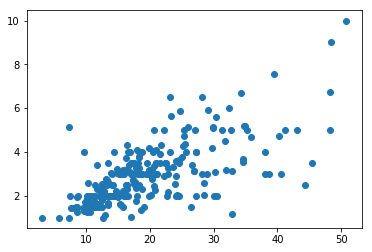

In [5]:
plt.scatter(x = tips.total_bill, y = tips.tip)

The result is as expected. A very basic scatter plot.

However, the basic plot lacks many essential components, such as axis lables and a title. Fortunately, these elements are easy to add with Matplotlib. The code in the cell below uses several methods to add some missing elements to the chart. Execute the code and examine the result.   

Text(0.5, 1.0, 'Tips vs. bill amount')

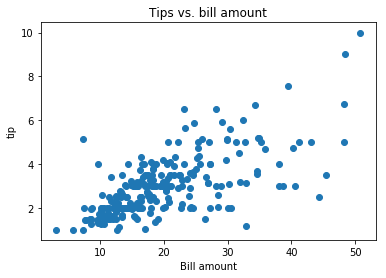

In [6]:
plt.scatter(x = tips.total_bill, y = tips.tip)
plt.xlabel('Bill amount')
plt.ylabel('tip')
plt.title('Tips vs. bill amount')

The plot now has reasonable annotation. 

In many cases it is important to control the figure size. Correct figure sizing can improve presentation and more importantly control aspect ratio. 

Size control of a Matplotlib figure can be done as follows:
1. A figure with specified dimensions or size is defined. 
2. An axis is then defined for a plot on this figure. 
3. Limits are set for the x and y axes. 
4. The scatter plot method includes specification of marker color, transparency and size.
5. Annotations are created by applying the appropriate methods on the axis object.   


Notice that a marker color and transparency are specified for the scatter plot. 

Execute this code and examine the result. 

Text(0.5, 1.0, 'Tips vs. bill amount')

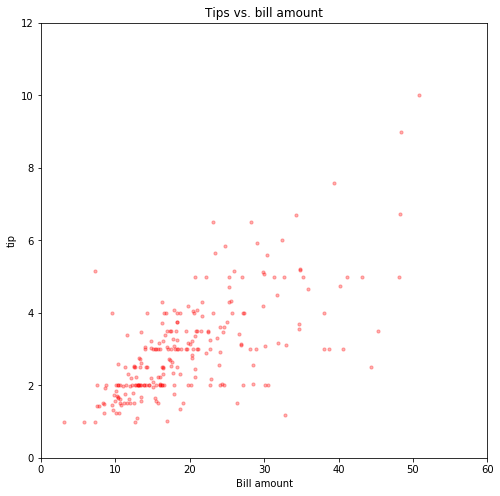

In [7]:
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis        
ax.scatter(x = tips.total_bill, y = tips.tip, c = 'red', alpha = 0.3, s = 10.0)
ax.set_xlim(0.0, 60.0)
ax.set_ylim(0.0, 12.0)
ax.set_xlabel('Bill amount')
ax.set_ylabel('tip')
ax.set_title('Tips vs. bill amount')

There are a great many attributes you can set for an axis. [Complete documentation for axis methods is available](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html).

A Matplotlib figure can have many axes, defining subplots. The Matplotlib documentation includes a [demonstration of using multiple axes](https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html) to create subplots. 

## Pandas Plot Methods

The Pandas package contains a number of simple and useful plot methods which operate on data frames. The simple recipe for plotting from Pandas data frames is:

- Use the plot method, along with the specific plot type method. Alternatively, you can use the `kind` argument of the plot method.
- Specify the columns with the values for the ``x`` and ``y`` axes. 

The code in the cell below creates a basic plot using the `plot.scatter` method. Execute the code and examine the result. 

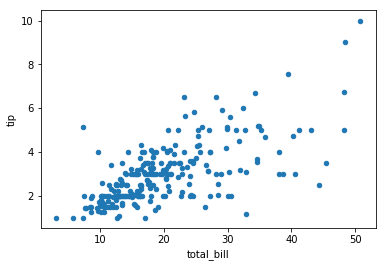

In [8]:
tips.plot.scatter(x = 'total_bill', y = 'tip')

Pandas as a number of useful plotting methods for dataframes. The Pandas documentation contains the details of these [plot methods and the available options](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Since Pandas plotting is based on Matplotlib you can use the same methods to customize a plot. The code in the cell below creates a plot identical to the one you previously created using Matplotlib alone. Notice that the definition of the axes and the plot attribute arguments and methods are identical. There is one difference. The `ax` argument is used to place the Pandas plot on the specified axes. Execute this code and examine the results.   

Text(0.5, 1.0, 'Tips vs. bill amount')

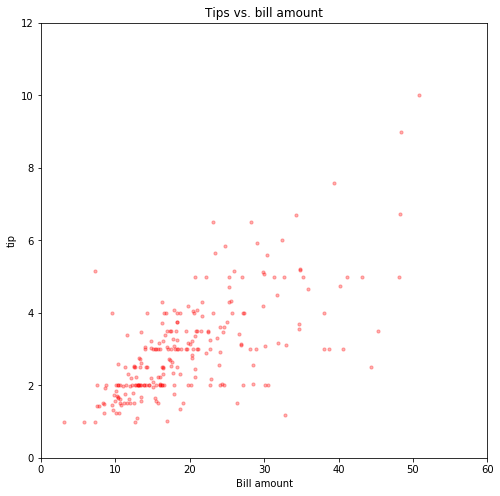

In [9]:
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis       
tips.plot.scatter(x = 'total_bill', y = 'tip', ax = ax, c = 'red', alpha = 0.3, s = 10.0)
ax.set_xlim(0.0, 60.0)
ax.set_ylim(0.0, 12.0)
ax.set_xlabel('Bill amount')
ax.set_ylabel('tip')
ax.set_title('Tips vs. bill amount')

You can see that the plot displayed is indeed identical to the one previously created. 

Let's try another example, creating a histogram. The code in the cell below is similar to that used to create a scatter plot. The Pandas `plot.hist` method is used in this example. Notice that the aspect ratio of this plot is different from previous examples. Execute the code and examine the result.  

Text(0, 0.5, 'Count')

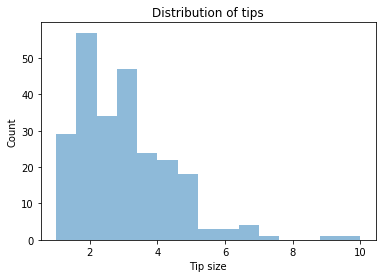

In [10]:
fig = plt.figure(figsize=(6, 4)) # define plot area
ax = fig.gca() # define axis    
tips['tip'].plot.hist(ax = ax, alpha = 0.5, bins = 15) # Use the plot.hist method on subset of the data frame
ax.set_title('Distribution of tips') # Give the plot a main title
ax.set_xlabel('Tip size') # Set text for the x axis
ax.set_ylabel('Count')# Set text for y axis

## Statistical Plotting with Seaborn 

We will now start working with the Seaborn package. Seaborn is a newer Python statistical plotting package which abstracts lower level matplotlib charts. Saborn also includes some additional cutting-edge chart types.

We will start with a basic statistical display, a box plot. Seaborn is built on top of Matplotlib. Therefore, the basic recipe for creating Seaborn plots is the same as other Matplotlib based packages. In the example below this recipe is:
1. Define the figure area and axes.
2. Set a style for the Seaborn plot. In this case, the commonly used `whitegrid` style is specified. 
3. The `boxplot` method is called. Seaborn operates on Pandas dataframes and the `data` argument is used to specified the dataframe to use. 
4. Other plot attributes are specified using the `set` method on the axes. 

Execute this code and examine the results. 

[(0.0, 60.0),
 Text(0, 0.5, 'Total bill'),
 Text(0.5, 0, 'Day of week'),
 Text(0.5, 1.0, 'Distribution of total bill by day of week')]

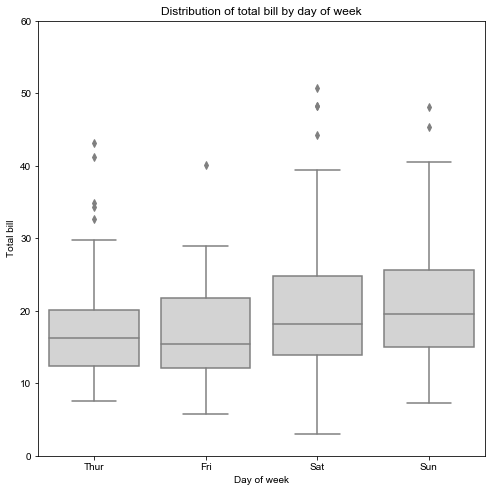

In [11]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
sns.set(style="whitegrid")
sns.boxplot(x = 'day', y = "total_bill", data = tips, ax = ax, color = "lightgray")
ax.set(ylim = (0.0, 60.0),
      title = 'Distribution of total bill by day of week',
      xlabel = 'Day of week',
      ylabel = 'Total bill')

### Kernel density plots with Seaborn

Let's try an example of creating kernel density plots. We will start with a one-dimensional KDE plot example. The recipe for this plot is the same as for the boxplot you created with Seaborn.   

There is one peculiarity with the `kdeplot` method. There is only a `data` argument which takes one or two columns of data. 

Execute the code and examine the result. 

Text(0, 0.5, 'Density')

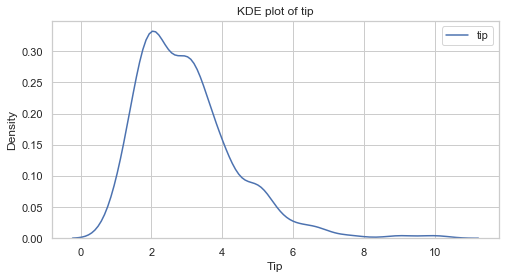

In [12]:
fig = plt.figure(figsize=(8,4)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(tips['tip'], ax = ax)
ax.set_title('KDE plot of tip') # Give the plot a main title
ax.set_xlabel('Tip') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Next, let's try a two-dimensional KDE plot. As before, the basic recipe is the same. Two columns are specified, one for each axis of the plot. A few other arguments are used. The `bw` argument sets the bandwidth of the kernel. The `cmap` argument specifies a color pallet. Execute this code and examine the result. 

C:\Users\StevePC2\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Total bill')

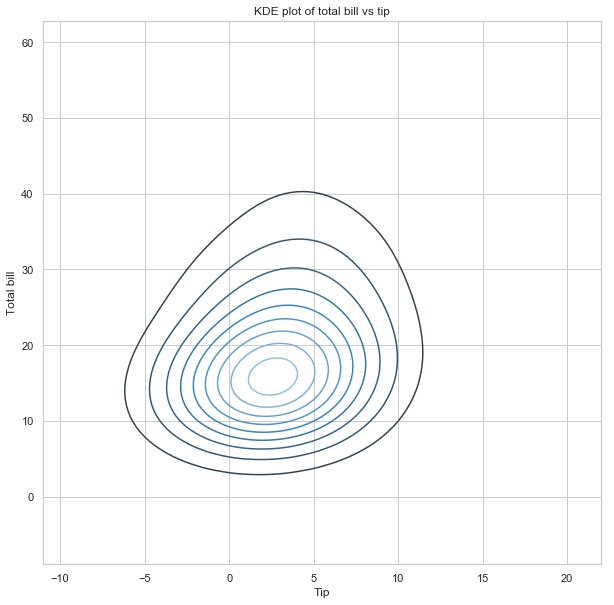

In [13]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(tips[['tip', 'total_bill']], bw = 4, ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of total bill vs tip') # Give the plot a main title
ax.set_xlabel('Tip') # Set text for the x axis
ax.set_ylabel('Total bill')# Set text for y axis

There are many other options for the kdeplot method. As with all Seaborn plot methods there is [extensive documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).   

### Violin plots in Seaborn

Violin plots are another commonly used statistical display. Seaborn has good support for this plot type. 

Additional dimensions of a dataset can be projected using the many Seaborn plot attributes. In the example below, the `hue` and `split` argument are used to split the violin plots by the `sex` variable. 

Execute this code to examine the results.    

Text(0, 0.5, 'Total bill')

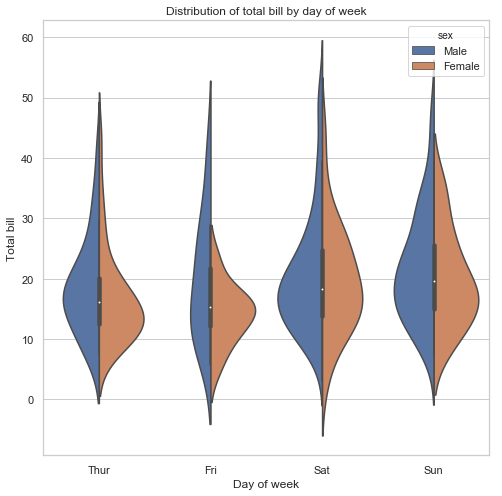

In [14]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
sns.set(style="whitegrid")
sns.violinplot(x = 'day', y = "total_bill", hue = 'sex', split = True, data = tips, ax = ax)
ax.set_title('Distribution of total bill by day of week') # Give the plot a main title
ax.set_xlabel('Day of week') # Set text for the x axis
ax.set_ylabel('Total bill')# Set text for y axis

### Plot attributes for projecting additional dimensions

Additional dimensions of complex datasets can be added to Seaborn plots. In this example we will use a scatter plot created with the `lmplot` method, which plots a regression line onto the plot. Two attributes are used to show additional dimensions of the dataset:
- The categorical `time` of the meal is shown using the `hue` attribute. 
- The numeric `size` of the party is shown as the marker size, using the `s` argument. 

Two attributes of this plot are passed to the underlying Matplotlib in the form of a Python dictionary, `alpha` and `s`. Most any [attribute of a Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) plot can be set in this matter.

Execute the code in the cell below and examine the result.  

Text(32.788723046875006, 0.5, 'Tip')

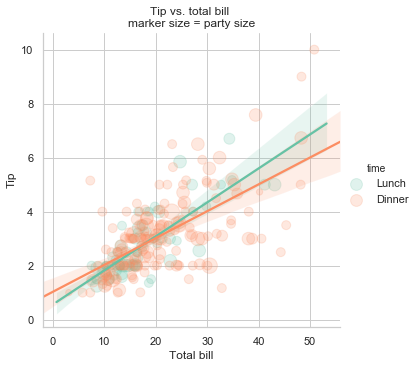

In [15]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = "time", palette="Set2", scatter_kws={'alpha':0.2, 's':40*tips['size']})     
plt.title('Tip vs. total bill \nmarker size = party size') # Give the plot a main title
plt.xlabel('Total bill') # Set text for the x axis
plt.ylabel('Tip')# Set text for y axis

### Facet plots

The Seaborn package has facilities for creating axes for displaying facet plots. Facet plots are defined in the following way:        

- A ``FacetGrid`` is defined for the data set. In this case we have only one facet (group by variable), across columns. 
- The ``map`` method is applied to the facet grid with a plot type specified. In this case, the ``regplot`` method to create a scatter plot. Notice that some plot attributes are passed to Matplotlib in a Python dictionary. 

Execute the code and examine the results. 

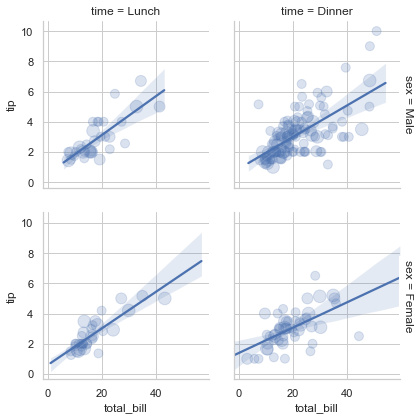

In [16]:
g = sns.FacetGrid(tips, col="time", row = 'sex', margin_titles=True)
g.map(sns.regplot, "total_bill", "tip", scatter_kws={'alpha':0.2, 's':40*tips['size']})

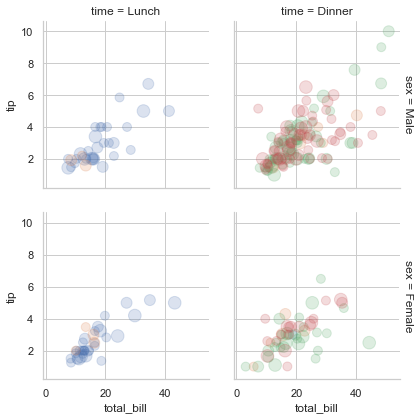

In [17]:
g = sns.FacetGrid(tips, col="time", row = 'sex', hue = "day", margin_titles=True)
g.map(sns.regplot, "total_bill", "tip", scatter_kws={'alpha':0.2, 's':40*tips['size']}, fit_reg = False)

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\StevePC2\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\StevePC2\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'scatter_kws'
  s)
C:\Users\StevePC2\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'scatter_kws'
  s)
C:\Users\StevePC2\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'scatter_kws'
  s)


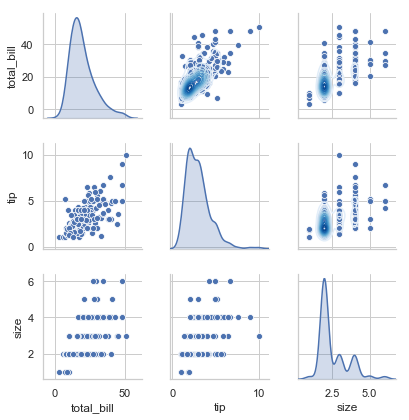

In [26]:
num_cols = ['total_bill', 'tip', 'size'] 
sns.pairplot(tips.loc[:, num_cols], diag_kind="kde",
#             hue= tips.day, palette="seismic",  
             size=2).map_upper(sns.kdeplot, cmap="Blues",  scatter_kws={'alpha':0.2, 's':40*tips['size']})

## Summary

We have covered a lot of ground in this tutorial. We have learned quite a bit about the relationships in the auto price data set by creating multiple views to visualize these data. 

Specifically, in this tutoral we have:

- Examined the uses of and methods for creation of several basic plot types.
- Used plot aesthetics to project additional dimensions onto a two dimensional plot surface, or to highlight aspects of the relationships in the data.
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. 

Finally, **have fun exploring your data!**